# Project: Twitter US Airline Sentiment

## Data Description:

A sentiment analysis job about the problems of each major U.S. airline.<br>
Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets,<br>
followed by categorizing negative reasons (such as "late flight" or "rude service").

## Dataset:
The project is from a dataset from Kaggle.<br>
Link to the Kaggle project site: https://www.kaggle.com/crowdflower/twitter-airline-sentiment <br>
The dataset has to be downloaded from the above Kaggle website.<br>
The dataset has the following columns:
- tweet_id
- airline_sentiment
- airline_sentiment_confidence
- negativereason
- negativereason_confidence
- airline
- airline_sentiment_gold
- name
- negativereason_gold
- retweet_count
- text
- tweet_coord
- tweet_created
- tweet_location
- user_timezone


## Steps:
1. Import the libraries, load dataset, print shape of data, data description.
2. Understand of data-columns: 
a. Drop all other columns except “text” and “airline_sentiment”.<br>
b. Check the shape of data.<br>
c. Print first 5 rows of data.<br>
3. Text pre-processing: Data preparation.
a. Html tag removal.<br>
b. Tokenization.<br>
c. Remove the numbers.<br>
d. Removal of Special Characters and Punctuations.<br>
e. Conversion to lowercase.<br>
f. Lemmatize or stemming.<br>
g. Join the words in the list to convert back to text string in the dataframe. (So that each row
contains the data in text format.)<br>
h. Print first 5 rows of data after pre-processing.<br>
4. Vectorization:
a. Use CountVectorizer.<br>
b. Use TfidfVectorizer.<br>
5. Fit and evaluate model using both type of vectorization.
6. Summarize your understanding of the application of Various Pre-processing and Vectorization and
performance of your model on this dataset.

#################################################################################################################################################################

In [1]:
###
### Import the libraries
###

import numpy as np
import pandas as pd


In [2]:
###
### Load dataset
###

data = pd.read_csv("Tweets.csv")

In [3]:
###
### Data shape
###

data.shape

(14640, 15)

In [4]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
data.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [6]:
###
### Data description
###

data.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,14640.0,5.692184e+17,7.791112e+14,5.675883e+17,5.685592e+17,5.694779e+17,5.698905e+17,5.703106e+17
airline_sentiment_confidence,14640.0,9.001689e-01,1.628300e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,10522.0,6.382983e-01,3.304398e-01,0.000000e+00,3.606000e-01,6.706000e-01,1.000000e+00,1.000000e+00
retweet_count,14640.0,8.265027e-02,7.457782e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


In [7]:
###
### Drop all other columns except "text" and "airline_sentiment" 
###

data = data[["airline_sentiment", "text"]]

In [8]:
###
### Data shape
###

data.shape

(14640, 2)

In [9]:
### First 5 rows of data

pd.set_option('display.max_colwidth', None)
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [10]:
data.tail()

,airline_sentiment,text
14635,positive,@AmericanAir thank you we got on a different flight to Chicago.
14636,negative,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc
14637,neutral,@AmericanAir Please bring American Airlines to #BlackBerry10
14638,negative,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"
14639,neutral,@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?


In [11]:
###############################################################################################################################################################################################
###
### Data pre-processing
###
###############################################################################################################################################################################################

In [12]:
###
### Remove HTML tag
###

from bs4 import BeautifulSoup

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [13]:
###
### Replace Contractions
###

import contractions

def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it


In [14]:
###
### Remove Numbers (Reg Ex)
###

import re

def remove_numbers(text):
    text = re.sub(r'\d+', '', text)
    return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it


In [15]:
###
### Remove Mentions (words start with @) in Twitter (Reg Ex)
###
### By Twitter
### Your username cannot be longer than 15 characters. Your real name can be longer (20 characters), but usernames are kept shorter for the sake of ease. 
### A username can only contain alphanumeric characters (letters A-Z, numbers 0-9) with the exception of underscores, as noted above. 
### Check to make sure your desired username doesn't contain any symbols, dashes, or spaces.
###

### Commented Out since this didn't help for improving (

# import re

# def remove_mention(text):
#     text = re.sub(r'(^|[^@\w])@(\w{1,15})\b', '', text)
#     return text

# data['text'] = data['text'].apply(lambda x: remove_mention(x))
# data.head() 

In [16]:
###
### Tokenize
###

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
data.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]"
2,neutral,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,negative,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]"
4,negative,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"


In [17]:
###
### Lemmatizing
###

from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_list(words):
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

data['text'] = data.apply(lambda row: lemmatize_list(row['text']), axis=1)
data.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, say, .]"
1,positive,"[@, VirginAmerica, plus, you, have, add, commercials, to, the, experience, ..., tacky, .]"
2,neutral,"[@, VirginAmerica, I, do, not, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,negative,"[@, VirginAmerica, it, be, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', face, &, they, have, little, recourse]"
4,negative,"[@, VirginAmerica, and, it, be, a, really, big, bad, thing, about, it]"


In [18]:
###
### Remove non-ASCII characters
###

import unicodedata

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

data['text'] = data.apply(lambda row: remove_non_ascii(row['text']), axis=1)
data.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, say, .]"
1,positive,"[@, VirginAmerica, plus, you, have, add, commercials, to, the, experience, ..., tacky, .]"
2,neutral,"[@, VirginAmerica, I, do, not, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,negative,"[@, VirginAmerica, it, be, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', face, &, they, have, little, recourse]"
4,negative,"[@, VirginAmerica, and, it, be, a, really, big, bad, thing, about, it]"


In [19]:
###
### Remove Punctuation
###

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words  

data['text'] = data.apply(lambda row: remove_punctuation(row['text']), axis=1)
data.head()

,airline_sentiment,text
0,neutral,"[VirginAmerica, What, dhepburn, say]"
1,positive,"[VirginAmerica, plus, you, have, add, commercials, to, the, experience, tacky]"
2,neutral,"[VirginAmerica, I, do, not, today, Must, mean, I, need, to, take, another, trip]"
3,negative,"[VirginAmerica, it, be, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, face, they, have, little, recourse]"
4,negative,"[VirginAmerica, and, it, be, a, really, big, bad, thing, about, it]"


In [20]:
###
### Remove Special Characters
###

def remove_special_characters(words):
    """Remove special characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^a-zA-Z0-9]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words  

data['text'] = data.apply(lambda row: remove_special_characters(row['text']), axis=1)
data.head()

,airline_sentiment,text
0,neutral,"[VirginAmerica, What, dhepburn, say]"
1,positive,"[VirginAmerica, plus, you, have, add, commercials, to, the, experience, tacky]"
2,neutral,"[VirginAmerica, I, do, not, today, Must, mean, I, need, to, take, another, trip]"
3,negative,"[VirginAmerica, it, be, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, face, they, have, little, recourse]"
4,negative,"[VirginAmerica, and, it, be, a, really, big, bad, thing, about, it]"


In [21]:
###
### Convert to lower case
###

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

data['text'] = data.apply(lambda row: to_lowercase(row['text']), axis=1)
data.head()

,airline_sentiment,text
0,neutral,"[virginamerica, what, dhepburn, say]"
1,positive,"[virginamerica, plus, you, have, add, commercials, to, the, experience, tacky]"
2,neutral,"[virginamerica, i, do, not, today, must, mean, i, need, to, take, another, trip]"
3,negative,"[virginamerica, it, be, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, face, they, have, little, recourse]"
4,negative,"[virginamerica, and, it, be, a, really, big, bad, thing, about, it]"


In [22]:
###
### Remove Stopwords
###

from nltk.corpus import stopwords  

stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))           
# Extra stop words beyond nltk that we want to leverage, Use set operations to reduce stop words -> or add as well.    

In [23]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

data['text'] = data.apply(lambda row: remove_special_characters(row['text']), axis=1)
data.head()

,airline_sentiment,text
0,neutral,"[virginamerica, what, dhepburn, say]"
1,positive,"[virginamerica, plus, you, have, add, commercials, to, the, experience, tacky]"
2,neutral,"[virginamerica, i, do, not, today, must, mean, i, need, to, take, another, trip]"
3,negative,"[virginamerica, it, be, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, face, they, have, little, recourse]"
4,negative,"[virginamerica, and, it, be, a, really, big, bad, thing, about, it]"


In [24]:
###
### Join the words in the list to convert back to text string in the dataframe.
###

data['text'] = data.apply(lambda row: ' '.join(row['text']), axis=1)
data.head()

,airline_sentiment,text
0,neutral,virginamerica what dhepburn say
1,positive,virginamerica plus you have add commercials to the experience tacky
2,neutral,virginamerica i do not today must mean i need to take another trip
3,negative,virginamerica it be really aggressive to blast obnoxious entertainment in your guests face they have little recourse
4,negative,virginamerica and it be a really big bad thing about it


In [25]:
###
### Summary of the application of Various Pre-Processing
###

### In this program, following pre-processings were performed:
###   - HTML tag removal
###   - Removal of numbers
###   - Removal of non-ASCII characters
###   - Removal of Special Characters and Punctuations
###   - Conversion to lower case
###   - Removal of Stopwords
###   - Lemmatization
###   - Tokenization
### These pre-processings were performed because of following reasons:
###   - Reduce the variations of the words
###   - Reduce the dimensionality of the input
###   - Remove the noise

In [26]:
###############################################################################################################################################################################################
###
### Vectorization & Evaluate models
###
###############################################################################################################################################################################################

In [27]:
###
### Labels
###

In [28]:
data.head()

,airline_sentiment,text
0,neutral,virginamerica what dhepburn say
1,positive,virginamerica plus you have add commercials to the experience tacky
2,neutral,virginamerica i do not today must mean i need to take another trip
3,negative,virginamerica it be really aggressive to blast obnoxious entertainment in your guests face they have little recourse
4,negative,virginamerica and it be a really big bad thing about it


In [29]:
data['airline_sentiment'][data['airline_sentiment'] == 'neutral'] = 0
data['airline_sentiment'][data['airline_sentiment'] == 'positive'] = 1
data['airline_sentiment'][data['airline_sentiment'] == 'negative'] = -1

In [30]:
data.head()

,airline_sentiment,text
0,0,virginamerica what dhepburn say
1,1,virginamerica plus you have add commercials to the experience tacky
2,0,virginamerica i do not today must mean i need to take another trip
3,-1,virginamerica it be really aggressive to blast obnoxious entertainment in your guests face they have little recourse
4,-1,virginamerica and it be a really big bad thing about it


In [31]:
labels = data['airline_sentiment'].astype('int')

In [32]:
labels[0:5]

0    0
1    1
2    0
3   -1
4   -1
Name: airline_sentiment, dtype: int64

In [33]:
###
### Split data into training and testing set
###

from sklearn.model_selection import train_test_split

data_features_text = np.array(data["text"])
X_train, X_test, y_train, y_test = train_test_split(data_features_text, labels, test_size=0.2, random_state=42,stratify=labels)

In [34]:
y_train.value_counts()
# Data is more skewed towards negative labels

-1    7342
 0    2479
 1    1891
Name: airline_sentiment, dtype: int64

In [35]:
y_test.value_counts()

-1    1836
 0     620
 1     472
Name: airline_sentiment, dtype: int64

In [36]:
print(X_train.shape)
print(y_train.shape)

(11712,)
(11712,)


In [37]:
print(X_train[9])
print(y_train[9])

unite there be a sector whereby it say in both bag no bag allowance at all in international flight
1


In [38]:
print(X_test.shape)
print(y_test.shape)

(2928,)
(2928,)


In [39]:
###
### Count Vectorizer
###

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=800)
X_train_vec = vectorizer.fit_transform(X_train)
# To avoid data leak, apply fit_transform to X_train only (not to the whole data)

In [40]:
vectorizer.get_feature_names()[:10]

['aa',
 'able',
 'about',
 'accept',
 'access',
 'accommodate',
 'account',
 'actually',
 'add',
 'address']

In [41]:
###
### Random Forest with Count Vectorizer
###

# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train_vec, y_train)

print(forest)
print(np.mean(cross_val_score(forest, X_train_vec, y_train, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7447045785084945


In [42]:
# Predict the result for test data using the model built above.
X_test_vec = vectorizer.fit_transform(X_test)
result = forest.predict(X_test_vec)

In [43]:
print('Accuracy on Test Data Set',sum(result == y_test) / len(y_test))

Accuracy on Test Data Set 0.4064207650273224


[[810 748 278]
 [219 320  81]
 [224 188  60]]


<AxesSubplot:>

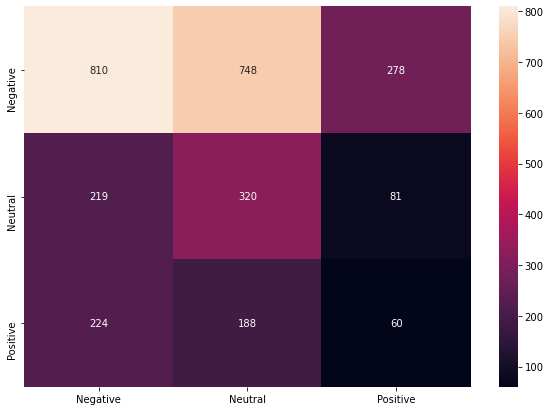

In [44]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ["Negative","Neutral","Positive"]],
                  columns = [i for i in ["Negative","Neutral","Positive"]])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [45]:
### Classification Report

from sklearn.metrics import classification_report, confusion_matrix

print("=== Classification Report ===")
print(classification_report(y_test, result))

=== Classification Report ===
              precision    recall  f1-score   support

          -1       0.65      0.44      0.52      1836
           0       0.25      0.52      0.34       620
           1       0.14      0.13      0.13       472

    accuracy                           0.41      2928
   macro avg       0.35      0.36      0.33      2928
weighted avg       0.48      0.41      0.42      2928



In [46]:
###
### TF-IDF Vectorizer
###

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1, 3))
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)

In [47]:
vectorizer_tfidf.get_feature_names()[:10]

['aa',
 'able',
 'able to',
 'about',
 'about the',
 'account',
 'actually',
 'add',
 'address',
 'after']

In [48]:
###
### Random Forest with TF-IDF Vectorizer
###

# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train_tfidf, y_train)

print(forest)
print(np.mean(cross_val_score(forest, X_train_tfidf, y_train, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7443634273090005


In [49]:
X_test_tfidf = vectorizer_tfidf.fit_transform(X_test)
result = forest.predict(X_test_tfidf)

In [50]:
print('Accuracy on Test Data Set',sum(result == y_test) / len(y_test))

Accuracy on Test Data Set 0.5990437158469946


<AxesSubplot:>

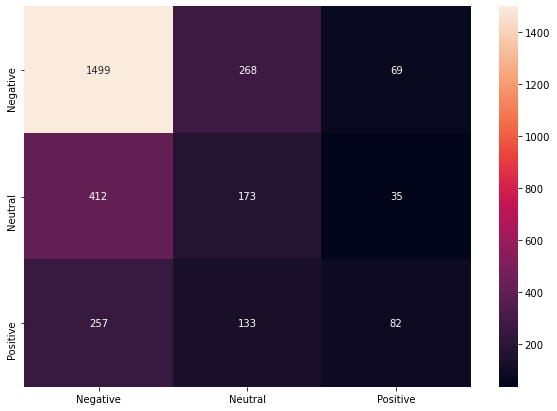

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ["Negative","Neutral","Positive"]],
                  columns = [i for i in ["Negative","Neutral","Positive"]])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')
# Model performs best at 5s and worst at 0s - error analysis to see why negative sentiment words arent being picked up

In [52]:
### Classification Report

from sklearn.metrics import classification_report, confusion_matrix

print("=== Classification Report ===")
print(classification_report(y_test, result))

=== Classification Report ===
              precision    recall  f1-score   support

          -1       0.69      0.82      0.75      1836
           0       0.30      0.28      0.29       620
           1       0.44      0.17      0.25       472

    accuracy                           0.60      2928
   macro avg       0.48      0.42      0.43      2928
weighted avg       0.57      0.60      0.57      2928



In [53]:
###
### Summary of the application of Vectorization
###

### CountVectorizer and TfidfVectorizer are both used to encode the words to integers or floating point valuses.
### By encoding to integers or floating point values, those data can be used as input of machine learning algorithm.
### This process is called vectorization.
### CountVectorizer transforms a given text into a vector based on the frequency of each words in the text.
### TfidfVectorizer is also a vectorizer and it is calculated by "TF: Term Frequency" times "IDF: Inverse Document Frequency".
### By multiplying IDF, it reduces the impact of tokens that occur frequently. 

### Overall, max_features=1000, worked better than 2000 or 500, and
### ngram_range=(1, 3) worked better than (1, 2) or (1, 4)

In [54]:
###
### Performance of the models on this dataset
###

### The accuracy on validation data are about 74% in both datasets which is fine. The accuracy on test data are 52% and 46% which are not very good.
### In both data sets, the models were doing relatively good on categorizing "Negative" data but not very good on "Positive" and "Neutral" data. This is because of inbalance of the original data.
### Overall, there are not large difference in the performance between two data sets.

In [55]:
####################################################################################################################################################################################################
###
### Experimental from here
###
####################################################################################################################################################################################################

In [56]:
####################################################################################################################################################################################################
###
### IMBLearn Random Over Sampling + Count Vectorizer
###
####################################################################################################################################################################################################

In [57]:
###
### Count Vectorizer
###

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000)
X_train_vec = vectorizer.fit_transform(X_train)
# To avoid data leak, apply fit_transform to X_train only (not to the whole data)

In [58]:
X_test_vec = vectorizer.fit_transform(X_test)

In [59]:
###
### IMBLearn Random Over Sampling
###

In [61]:
from imblearn.over_sampling import RandomOverSampler

In [62]:
print(X_train_vec.shape)
print(y_train.shape)
print(X_test_vec.shape)
print(y_test.shape)

(11712, 1000)
(11712,)
(2928, 1000)
(2928,)


In [63]:
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} ".format(sum(y_train==0)))
print("Before UpSampling, counts of label '-1': {}".format(sum(y_train==-1)))

Before UpSampling, counts of label '1': 1891
Before UpSampling, counts of label '0': 2479 
Before UpSampling, counts of label '-1': 7342


In [64]:
ros = RandomOverSampler()

X_train_ros_vec, y_train_ros_vec = ros.fit_sample(X_train_vec, y_train)

In [65]:
X_train_ros_vec.shape

(22026, 1000)

In [66]:
y_train_ros_vec.shape

(22026,)

In [67]:
print("Before UpSampling, counts of label '1': {}".format(sum(y_train_ros_vec==1)))
print("Before UpSampling, counts of label '0': {} ".format(sum(y_train_ros_vec==0)))
print("Before UpSampling, counts of label '-1': {}".format(sum(y_train_ros_vec==-1)))

Before UpSampling, counts of label '1': 7342
Before UpSampling, counts of label '0': 7342 
Before UpSampling, counts of label '-1': 7342


In [68]:
###
### Random Forest with Count Vectorizer
###

# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

In [69]:
forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train_ros_vec, y_train_ros_vec)

print(forest)
print(np.mean(cross_val_score(forest, X_train_ros_vec, y_train_ros_vec, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.9378028598604085


In [70]:
# Predict the result for test data using the model built above.
result = forest.predict(X_test_vec)

In [71]:
print('Accuracy on Test Data Set',sum(result == y_test) / len(y_test))

Accuracy on Test Data Set 0.38080601092896177


[[667 840 329]
 [154 358 108]
 [ 98 284  90]]


<AxesSubplot:>

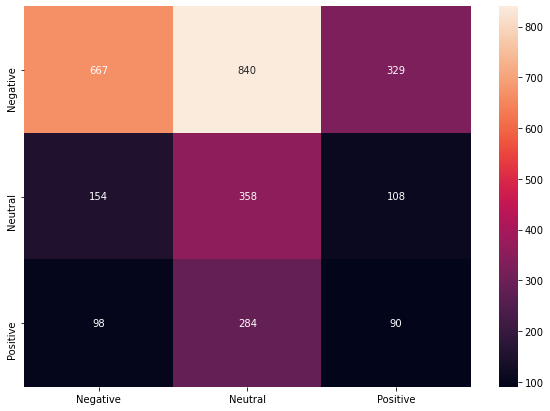

In [72]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ["Negative","Neutral","Positive"]],
                  columns = [i for i in ["Negative","Neutral","Positive"]])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [73]:
### Classification Report

from sklearn.metrics import classification_report, confusion_matrix

print("=== Classification Report ===")
print(classification_report(y_test, result))

=== Classification Report ===
              precision    recall  f1-score   support

          -1       0.73      0.36      0.48      1836
           0       0.24      0.58      0.34       620
           1       0.17      0.19      0.18       472

    accuracy                           0.38      2928
   macro avg       0.38      0.38      0.34      2928
weighted avg       0.53      0.38      0.40      2928



In [74]:
###
### Summary: Random Forest with Count Vectorizer + IMBLearn Random Over Sampling
###

In [75]:
### Random Forest with Count Vectorizer + IMBLearn Random Over Sampling resulted in good performance in validation data but poor performance in testing data.
### It seems like it is causing an overfitting.

In [76]:
####################################################################################################################################################################################################
###
### IMBLearn Random Over Sampling + TF-IDF Vectorizer
###
####################################################################################################################################################################################################

In [77]:
###
### TF-IDF Vectorizer
###

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1, 3))
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)

In [78]:
X_test_tfidf = vectorizer_tfidf.fit_transform(X_test)

In [79]:
###
### IMBLearn Random Over Sampling
###

In [80]:
from imblearn.over_sampling import RandomOverSampler

### IF this cell resulted to error, run the same cell again.

In [81]:
print(X_train_tfidf.shape)
print(y_train.shape)
print(X_test_tfidf.shape)
print(y_test.shape)

(11712, 1000)
(11712,)
(2928, 1000)
(2928,)


In [82]:
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} ".format(sum(y_train==0)))
print("Before UpSampling, counts of label '-1': {}".format(sum(y_train==-1)))

Before UpSampling, counts of label '1': 1891
Before UpSampling, counts of label '0': 2479 
Before UpSampling, counts of label '-1': 7342


In [83]:
ros = RandomOverSampler()

X_train_ros_tfidf, y_train_ros_tfidf = ros.fit_sample(X_train_tfidf, y_train)

In [84]:
X_train_ros_tfidf.shape

(22026, 1000)

In [85]:
y_train_ros_tfidf.shape

(22026,)

In [86]:
print("Before UpSampling, counts of label '1': {}".format(sum(y_train_ros_tfidf==1)))
print("Before UpSampling, counts of label '0': {} ".format(sum(y_train_ros_tfidf==0)))
print("Before UpSampling, counts of label '-1': {}".format(sum(y_train_ros_tfidf==-1)))

Before UpSampling, counts of label '1': 7342
Before UpSampling, counts of label '0': 7342 
Before UpSampling, counts of label '-1': 7342


In [87]:
###
### Random Forest with TF-IDF Vectorizer
###

# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train_ros_tfidf, y_train_ros_tfidf)

print(forest)
print(np.mean(cross_val_score(forest, X_train_ros_tfidf, y_train_ros_tfidf, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.9377575084425788


In [88]:
result = forest.predict(X_test_tfidf)

In [89]:
print('Accuracy on Test Data Set',sum(result == y_test) / len(y_test))

Accuracy on Test Data Set 0.5153688524590164


<AxesSubplot:>

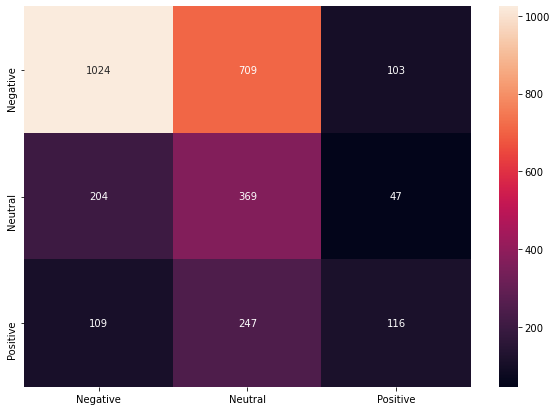

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ["Negative","Neutral","Positive"]],
                  columns = [i for i in ["Negative","Neutral","Positive"]])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')
# Model performs best at 5s and worst at 0s - error analysis to see why negative sentiment words arent being picked up

In [91]:
### Classification Report

from sklearn.metrics import classification_report, confusion_matrix

print("=== Classification Report ===")
print(classification_report(y_test, result))

=== Classification Report ===
              precision    recall  f1-score   support

          -1       0.77      0.56      0.65      1836
           0       0.28      0.60      0.38       620
           1       0.44      0.25      0.31       472

    accuracy                           0.52      2928
   macro avg       0.49      0.47      0.45      2928
weighted avg       0.61      0.52      0.54      2928



In [92]:
####################################################################################################################################################################################################
###
### Random Forest with TF-IDF Vectorizer +  Random CV
###
####################################################################################################################################################################################################

In [93]:
###
### Note: Since TF-IDF Vectorizer (without Oversampling) was better performance, try Random CV to see whether it will improve the performance
###

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1, 3))
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.fit_transform(X_test)

In [95]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [96]:
# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [97]:
# build a classifier
clf = RandomForestClassifier(n_estimators=50)

In [98]:
# run randomized search
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=samples) #default cv = 3

In [99]:
###
### Random Forest with TF-IDF Vectorizer +  Random CV
###

# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#randomCV.fit(X, y)
randomCV.fit(X_train_tfidf, y_train)
 
print(randomCV.best_params_)

print(randomCV)

print(np.mean(cross_val_score(randomCV, X_train_tfidf, y_train, cv=10)))

{'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 8}
RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                         

In [100]:
result = randomCV.predict(X_test_tfidf)

In [101]:
print('Accuracy on Test Data Set',sum(result == y_test) / len(y_test))

Accuracy on Test Data Set 0.6711065573770492


In [102]:
randomCV.score(X_test_tfidf, y_test)

0.6711065573770492

In [103]:
print(randomCV.best_params_)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 8}


<AxesSubplot:>

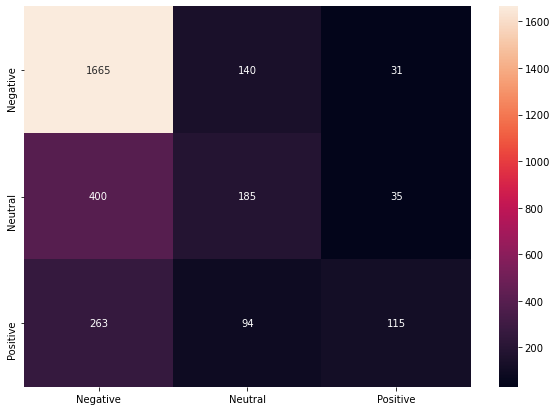

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ["Negative","Neutral","Positive"]],
                  columns = [i for i in ["Negative","Neutral","Positive"]])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')
# Model performs best at 5s and worst at 0s - error analysis to see why negative sentiment words arent being picked up

In [105]:
### Classification Report

from sklearn.metrics import classification_report, confusion_matrix

print("=== Classification Report ===")
print(classification_report(y_test, result))

=== Classification Report ===
              precision    recall  f1-score   support

          -1       0.72      0.91      0.80      1836
           0       0.44      0.30      0.36       620
           1       0.64      0.24      0.35       472

    accuracy                           0.67      2928
   macro avg       0.60      0.48      0.50      2928
weighted avg       0.64      0.67      0.63      2928



In [106]:
###
### Note: Random Forest with TF-IDF Vectorizer +  Random CV
###
### Random CV improved the performance.
### This case resulted to the best performance.

### Github
*https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-aug20-KokiTabayashi.git*